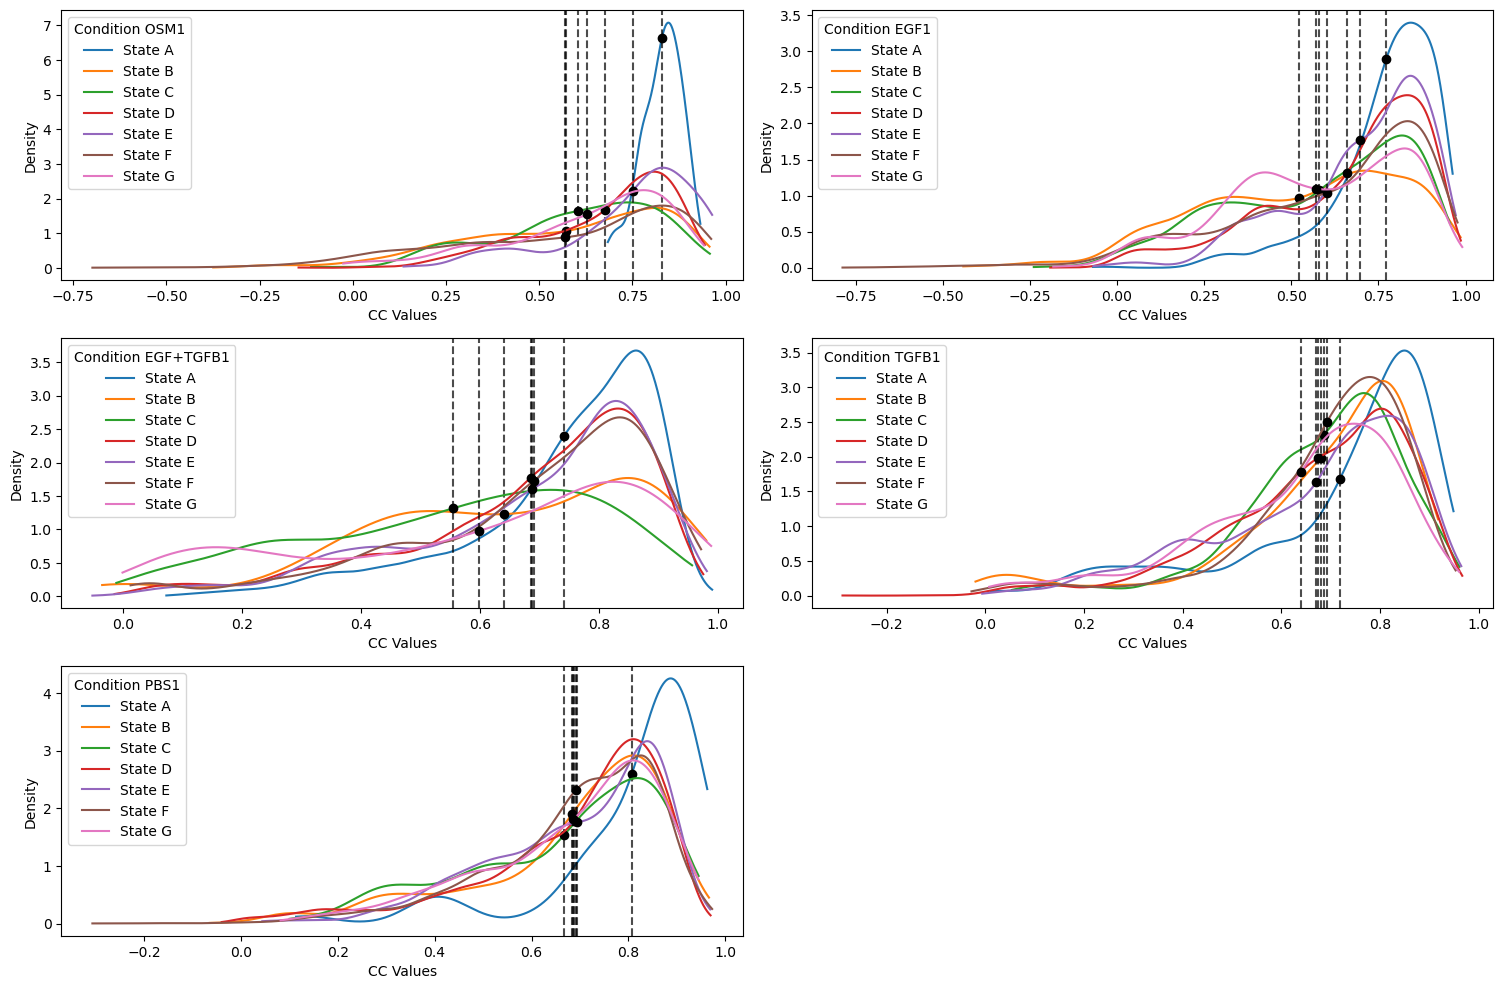

In [5]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np
import math

filename = 'ccTrajDcomp_MacStatesLI204601_P_tl40Awells0_Apr03-2024_nS7'
# Loading the saved data
data = np.load(filename+'.npz', allow_pickle=True)
cc_values_by_macrostate = data['cc_vals_by_macrostate'].item()

conditions = ['OSM1', 'EGF1', 'EGF+TGFB1', 'TGFB1', 'PBS1']
conditions = np.array(conditions)
# Assuming 'n_conds' dynamically reflects the loaded data
n_conds = conditions.size

# Calculate rows and columns for subplots dynamically
cols = round(math.sqrt(n_conds))
rows = math.ceil(n_conds / cols)

# Create subplot grid
fig, axs = plt.subplots(rows, cols, figsize=(15, 10), squeeze=False)
axs = axs.flatten()

# Iterate over conditions and states to plot data
for model_index, (condition, macrostates) in enumerate(cc_values_by_macrostate.items()):
    ax = axs[model_index]
    
    for state, values in macrostates.items():
        if len(values) > 0:  # Ensure there are values to plot
            kde = gaussian_kde(values)
            x_range = np.linspace(min(values), max(values), 1000)
            ax.plot(x_range, kde(x_range), label=f'State {state}')
            
            mean_x = np.mean(values)
            mean_y = kde(mean_x)
            ax.plot(mean_x, mean_y, 'o', color='k')
            ax.axvline(mean_x, color='k', linestyle='--', alpha=0.7)
    
    ax.legend(title=f'Condition {conditions[condition]}')
    ax.set_xlabel('CC Values')
    ax.set_ylabel('Density')

# Hide unused subplots
for empty_ax in axs[n_conds:]:
    empty_ax.set_visible(False)

plt.tight_layout()
#plt.show()
plt.savefig(filename+'.png', bbox_inches='tight', dpi=500)